## 피처엔지니어링
- 스케일
- 인코딩
- 데이터 : data_atype.zip (수업노트에서 다운로드)

In [ ]:
# 데이터 불러오기
import pandas as pd
X_train = pd.read_csv("https://raw.githubusercontent.com/lovedlim/inf/main/p2/data_atype/X_train.csv")
y_train = pd.read_csv("https://raw.githubusercontent.com/lovedlim/inf/main/p2/data_atype/y_train.csv")
X_test = pd.read_csv("https://raw.githubusercontent.com/lovedlim/inf/main/p2/data_atype/X_test.csv")
# X_train = pd.read_csv("X_train.csv")
# y_train = pd.read_csv("y_train.csv")
# X_test = pd.read_csv("X_test.csv")

In [ ]:
# 데이터 샘플 확인
X_train.head()

,id,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
0,3331,34.0,State-gov,177331,Some-college,10,Married-civ-spouse,Prof-specialty,Husband,Black,Male,4386,0,40.0,United-States
1,19749,58.0,Private,290661,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40.0,United-States
2,1157,48.0,Private,125933,Some-college,10,Widowed,Exec-managerial,Unmarried,Black,Female,0,1669,38.0,United-States
3,693,58.0,Private,100313,Some-college,10,Married-civ-spouse,Protective-serv,Husband,White,Male,0,1902,40.0,United-States
4,12522,41.0,Private,195661,Some-college,10,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,54.0,United-States


## 데이터 전처리 (이전시간 작업)

In [ ]:
# X_train데이터
X_train['workclass'] = X_train['workclass'].fillna(X_train['workclass'].mode()[0])
X_train['native.country'] = X_train['native.country'].fillna(X_train['native.country'].mode()[0])
X_train['occupation'] = X_train['occupation'].fillna("X")
X_train['age'] = X_train['age'].fillna(int(X_train['age'].mean()))
X_train['hours.per.week'] = X_train['hours.per.week'].fillna(X_train['hours.per.week'].median())

# X_test데이터
X_test['workclass'] = X_test['workclass'].fillna(X_test['workclass'].mode()[0])
X_test['native.country']  = X_test['native.country'].fillna(X_test['native.country'].mode()[0])
X_test['occupation'] = X_test['occupation'].fillna("X")
X_test['age'] = X_test['age'].fillna(int(X_train['age'].mean()))
X_test['hours.per.week'] = X_test['hours.per.week'].fillna(X_train['hours.per.week'].median())

In [ ]:
# 결측치 확인
X_train.isnull().sum()

,0
id,0
age,0
workclass,0
fnlwgt,0
education,0
education.num,0
marital.status,0
occupation,0
relationship,0
race,0


## 수치형 데이터와 범주형 데이터 분리

In [ ]:
# 데이터 타입 확인
X_train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29304 entries, 0 to 29303
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              29304 non-null  int64  
 1   age             29304 non-null  float64
 2   workclass       29304 non-null  object 
 3   fnlwgt          29304 non-null  int64  
 4   education       29304 non-null  object 
 5   education.num   29304 non-null  int64  
 6   marital.status  29304 non-null  object 
 7   occupation      29304 non-null  object 
 8   relationship    29304 non-null  object 
 9   race            29304 non-null  object 
 10  sex             29304 non-null  object 
 11  capital.gain    29304 non-null  int64  
 12  capital.loss    29304 non-null  int64  
 13  hours.per.week  29304 non-null  float64
 14  native.country  29304 non-null  object 
dtypes: float64(2), int64(5), object(8)
memory usage: 3.4+ MB


In [ ]:
# 수치형 컬럼과 범주형 컬럼 데이터 나누기
# n_train = X_train.select_dtypes(exclude='object').copy()
# n_test = X_test.select_dtypes(exclude='object').copy()

# c_train = X_train.select_dtypes(include='object').copy()
# c_test = X_test.select_dtypes(include='object').copy()


# 데이터를 매번 새롭게 불러오기 위해 함수로 제작 함
def get_nc_data():
    X_train = pd.read_csv("https://raw.githubusercontent.com/lovedlim/inf/main/p2/data_atype/X_train.csv")
    y_train = pd.read_csv("https://raw.githubusercontent.com/lovedlim/inf/main/p2/data_atype/y_train.csv")
    X_test = pd.read_csv("https://raw.githubusercontent.com/lovedlim/inf/main/p2/data_atype/X_test.csv")

    n_train = X_train.select_dtypes(exclude='object').copy()
    n_test = X_test.select_dtypes(exclude='object').copy()
    c_train = X_train.select_dtypes(include='object').copy()
    c_test = X_test.select_dtypes(include='object').copy()
    return n_train, n_test, c_train, c_test

n_train, n_test, c_train, c_test = get_nc_data() # 데이터 새로 불러오기

#n_train의 n은 numeric임
# .copy() 붙였기때문에 n_train 데이터 등 사본임!!!

In [ ]:
# 데이처 확인(수치형 데이터)
n_train.head(2)

,id,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
0,3331,34.0,177331,10,4386,0,40.0
1,19749,58.0,290661,9,0,0,40.0


In [ ]:
# 데이처 확인(범주형 데이터)
c_train.head()

,workclass,education,marital.status,occupation,relationship,race,sex,native.country
0,State-gov,Some-college,Married-civ-spouse,Prof-specialty,Husband,Black,Male,United-States
1,Private,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,Male,United-States
2,Private,Some-college,Widowed,Exec-managerial,Unmarried,Black,Female,United-States
3,Private,Some-college,Married-civ-spouse,Protective-serv,Husband,White,Male,United-States
4,Private,Some-college,Married-civ-spouse,Transport-moving,Husband,White,Male,United-States


## 스케일링
- 트리기반의 모델은 입력의 스케일을 크게 신경쓰지 않아도 됨
- 선형회귀나 로지스틱 회귀 등과 같은 모델은 입력의 스케일링에 영향을 받음

In [ ]:
# 스케일링 작업할 컬럼명
cols = ['age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss', 'hours.per.week']

In [ ]:
# 민-맥스 스케일링 MinMaxScaler (모든 값이 0과 1사이)
n_train, n_test, c_train, c_test = get_nc_data() # 데이터 새로 불러오기
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
display(n_train.head(2))
n_train[cols] = scaler.fit_transform(n_train[cols])
n_test[cols] = scaler.transform(n_test[cols])
display(n_train.head(2))

#display함수는 실제 시험에서는 쓸 수 없음. display 뺴고 실행해보니까 눈에 보이도록 값이 나오진 않음, 그냥 테이블만 작업이 된것으로 알면될듯
#transform 변환 작업 -> test 데이터는 변환작업만 하고
# fit 은 학습 시키는것 -> train 데이터에서 학습시킨 데이터를 바탕으로 test데이터에서는 변환 작업만 하는것!

,id,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
0,3331,34.0,177331,10,4386,0,40.0
1,19749,58.0,290661,9,0,0,40.0


,id,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
0,3331,0.5625,0.112092,0.600000,0.04386,0.0,0.397959
1,19749,0.7500,0.189060,0.533333,0.00000,0.0,0.397959


※ 시험응시시 display 함수는 쓸수 없다!!!
이쁘게 시각화 하기 위해서 인강에서 그냥 해놓은것!
업무에는 괜찮은데, 시험때는 못씀

In [ ]:
# 표준화 StandardScaler (Z-score 정규화, 평균이 0 표준편차가 1인 표준 정규분포로 변경)
n_train, n_test, c_train, c_test = get_nc_data() # 데이터 새로 불러오기
#위에MinMaxScaling을 했기 때문에 수치형 데이터와 범주형 데이터 분리를 다시 실행 시킨 후 진행해야함
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
display(n_train.head(2))
n_train[cols] = scaler.fit_transform(n_train[cols])
n_test[cols] = scaler.transform(n_test[cols])
display(n_train.head(2))


,id,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
0,3331,34.0,177331,10,4386,0,40.0
1,19749,58.0,290661,9,0,0,40.0


,id,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
0,3331,-0.334094,-0.117678,-0.031447,0.440284,-0.216045,-0.035235
1,19749,1.426912,0.956304,-0.420434,-0.146290,-0.216045,-0.035235


In [ ]:
# 로버스트 스케일링 : 중앙값과 사분위 값 활용, 이상치 영향 최소화 장점
n_train, n_test, c_train, c_test = get_nc_data() # 데이터 새로 불러오기
# minmax나 standard slacer는 이상치가 있었을때 예쁘게 변환이 안됨. 이때 쓰는 것이 -> 로버스트 스케일링!!!!
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
display(n_train.head(2))
n_train[cols] = scaler.fit_transform(n_train[cols])
n_test[cols] = scaler.transform(n_test[cols])
display(n_train.head(2))

,id,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
0,3331,34.0,177331,10,4386,0,40.0
1,19749,58.0,290661,9,0,0,40.0


,id,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
0,3331,-0.15,-0.008765,0.000000,4386.0,0.0,0.0
1,19749,1.05,0.941358,-0.333333,0.0,0.0,0.0


<Axes: >

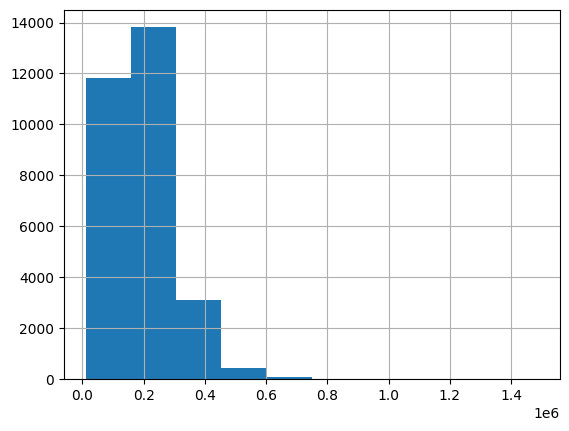

In [ ]:
# 로그 변환 예시
# 시험에서는 이렇게 시각화를 할 수 없지만, 이해를 돕기 위해 진행
X_train['fnlwgt'].hist()
# X_train['id'].hist()
# X_train['age'].hist()

np.log1p(X_train['fnlwgt'][:3])와 np.log1p(X_train['fnlwgt'])[:3]의 차이는 데이터의 선택 순서에 있습니다. 이를 통해 로그 변환 적용 시점이 다르다는 차이가 발생합니다.

np.log1p(X_train['fnlwgt'][:3]): 처음 3개의 값만 추출하여 로그 변환을 수행.
np.log1p(X_train['fnlwgt'])[:3]: 전체에 로그 변환 후 처음 3개의 값을 반환.

In [ ]:
# 로그 변환 전후 확인
import numpy as np
print(X_train['fnlwgt'][:3])
np.log1p(X_train['fnlwgt'])[:3]

0    177331
1    290661
2    125933
Name: fnlwgt, dtype: int64


,fnlwgt
0,12.085779
1,12.579916
2,11.743513


<Axes: >

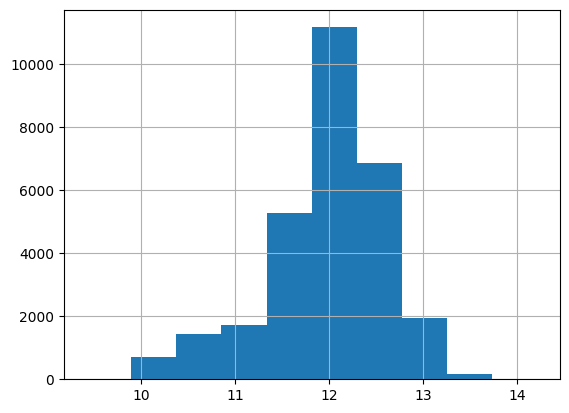

In [ ]:
# 로그 변환 후 시각화
np.log1p(X_train['fnlwgt']).hist()

In [ ]:
# np.exp
# 원래 값으로 돌리는 방법 but 완벽하게 돌아오지는 않고 1,2 정도 차이가 난다
np.exp(np.log1p(X_train['fnlwgt']))

np.exp(np.log1p(X_train['fnlwgt'])

,fnlwgt
0,177332.0
1,290662.0
2,125934.0
3,100314.0
4,195662.0
...,...
29299,47169.0
29300,231794.0
29301,201436.0
29302,137723.0


## 인코딩
- 라벨(label) 인코딩
- 원핫(one-hot) 인코딩

In [ ]:
# 범주형 데이터 확인(인코딩 전)
c_train.head()

,workclass,education,marital.status,occupation,relationship,race,sex,native.country
0,State-gov,Some-college,Married-civ-spouse,Prof-specialty,Husband,Black,Male,United-States
1,Private,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,Male,United-States
2,Private,Some-college,Widowed,Exec-managerial,Unmarried,Black,Female,United-States
3,Private,Some-college,Married-civ-spouse,Protective-serv,Husband,White,Male,United-States
4,Private,Some-college,Married-civ-spouse,Transport-moving,Husband,White,Male,United-States


In [ ]:
# object 컬럼명
# 2가지 방법이 있음 list 써서 라벨형태로 불러오는 방식과 cols를 써서 하나씻 써서 불러오는 형태
# list(X_train.columns[X_train.dtypes == object]) #1번방식
cols = ['workclass', 'education','marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country'] #2번방식
cols

['workclass',
 'education',
 'marital.status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native.country']

In [ ]:
# 라벨 인코딩
n_train, n_test, c_train, c_test = get_nc_data() # 데이터 새로 불러오기
#라벨인코딩은 컬럼 하나하나를 선택해서 변경작업을 해야함
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for col in cols:
    le = LabelEncoder()
    c_train[col] = le.fit_transform(c_train[col])
    c_test[col] = le.transform(c_test[col])


In [ ]:
# 범주형 데이터 확인(인코딩 후)
c_train.head()

,workclass,education,marital.status,occupation,relationship,race,sex,native.country
0,6,15,2,9,0,2,1,38
1,3,11,2,2,0,4,1,38
2,3,15,6,3,4,2,0,38
3,3,15,2,10,0,4,1,38
4,3,15,2,13,0,4,1,38


In [ ]:
# 원핫 인코딩
n_train, n_test, c_train, c_test = get_nc_data() # 데이터 새로 불러오기
#원핫 인코딩은 pandas에서 지원을 해주고 있어서 sklearn에서 안불러와도 됨
display(c_train.head())
c_train = pd.get_dummies(c_train[cols])
c_test = pd.get_dummies(c_test[cols])
display(c_train.head())


,workclass,education,marital.status,occupation,relationship,race,sex,native.country
0,State-gov,Some-college,Married-civ-spouse,Prof-specialty,Husband,Black,Male,United-States
1,Private,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,Male,United-States
2,Private,Some-college,Widowed,Exec-managerial,Unmarried,Black,Female,United-States
3,Private,Some-college,Married-civ-spouse,Protective-serv,Husband,White,Male,United-States
4,Private,Some-college,Married-civ-spouse,Transport-moving,Husband,White,Male,United-States


,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,education_10th,education_11th,...,native.country_Portugal,native.country_Puerto-Rico,native.country_Scotland,native.country_South,native.country_Taiwan,native.country_Thailand,native.country_Trinadad&Tobago,native.country_United-States,native.country_Vietnam,native.country_Yugoslavia
0,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


## 데이터 합치기

In [ ]:
# 분리한 데이터 다시 합침
n_train, n_test, c_train, c_test = get_nc_data() # 데이터 새로 불러오기
#나중에 수치형 데이터와 범주형데이터를 옆으로 붙여줘야함
# 기본적으로 concat 사용해서 붙일때는 위아래로 합치게 되어있어서, axis =1 로 해줘야함
#train데이터에 사과랑 배만 있어서 fit해서 학습시키고, transform해서 변환 시킨후 test도 했는데 여기에 딸기데이터가 있는경우 오류가 뜸, 그래서 인코딩 할떄, train과 test 데이터를 합친 뒤에 다시 분리후 학습을 시켜야 할 수 있기 때문에
# 합치기와 분리하기는 반드시 알아야함!!!!
X_train = pd.concat([n_train, c_train], axis=1)
X_test = pd.concat([n_test, c_test], axis=1)
print(X_train.shape, X_test.shape)
X_train.head()

(29304, 15) (3257, 15)


,id,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,workclass,education,marital.status,occupation,relationship,race,sex,native.country
0,3331,34.0,177331,10,4386,0,40.0,State-gov,Some-college,Married-civ-spouse,Prof-specialty,Husband,Black,Male,United-States
1,19749,58.0,290661,9,0,0,40.0,Private,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,Male,United-States
2,1157,48.0,125933,10,0,1669,38.0,Private,Some-college,Widowed,Exec-managerial,Unmarried,Black,Female,United-States
3,693,58.0,100313,10,0,1902,40.0,Private,Some-college,Married-civ-spouse,Protective-serv,Husband,White,Male,United-States
4,12522,41.0,195661,10,0,0,54.0,Private,Some-college,Married-civ-spouse,Transport-moving,Husband,White,Male,United-States


In [ ]:
# 데이터 새로 불러오기
import pandas as pd
X_train = pd.read_csv("https://raw.githubusercontent.com/lovedlim/inf/main/p2/data_atype/X_train.csv")
y_train = pd.read_csv("https://raw.githubusercontent.com/lovedlim/inf/main/p2/data_atype/y_train.csv")
X_test = pd.read_csv("https://raw.githubusercontent.com/lovedlim/inf/main/p2/data_atype/X_test.csv")
# X_train = pd.read_csv("X_train.csv")
# y_train = pd.read_csv("y_train.csv")
# X_test = pd.read_csv("X_test.csv")

In [ ]:
# train, test 합쳐서 인코딩 후 분리하기
#iloc를 통해서 잘라낼 거임 가로로 계속 붙였던것을 이제 가로에 줄 하나 그어서 뚝 잘라낸다는 말임
cols= list(X_train.columns[X_train.dtypes == object])
print(X_train.shape, X_test.shape)

all_df = pd.concat([X_train, X_test])

all_df = pd.get_dummies(all_df[cols])

line = int(X_train.shape[0])
X_train = all_df.iloc[:line,:].copy()
X_train

X_test = all_df.iloc[line:,:].copy()
X_test

print(X_train.shape, X_test.shape)



(29304, 15) (3257, 15)
(29304, 99) (3257, 99)


## 정리

In [ ]:
# 데이터 분리
n_train, n_test, c_train, c_test = get_nc_data() # 데이터 새로 불러오기

n_train = X_train.select_dtypes(exclude='object').copy()
n_test = X_test.select_dtypes(exclude = 'object').copy()

c_train = X_train.select_dtypes(include='object').copy()
c_test = X_test.select_dtypes(include = 'object').copy()

In [ ]:
# 수치형 - 민맥스 스케일링
cols = ['age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss', 'hours.per.week']
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
n_train[cols] = scaler.fit_transform(n_train[cols])
n_test[cols] = scaler.transform(n_test[cols])


In [ ]:
# 라벨 인코딩
cols = ['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country']
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in cols:
  le = LabelEncoder()
  c_train[col] = le.fit_transform(c_train[col])
  c_test[col] = le.transform(c_test[col])


In [ ]:
# 분리한 데이터 다시 합침
X_train = pd.concat([n_train, c_train], axis=1)
X_test = pd.concat([n_test, C_test], axis=1)
print(x_train.shape, X_test.shape)
X_train.head()


In [ ]:
# 데이터 확인
X_train.head()

,id,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
0,3331,34.0,State-gov,177331,Some-college,10,Married-civ-spouse,Prof-specialty,Husband,Black,Male,4386,0,40.0,United-States
1,19749,58.0,Private,290661,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40.0,United-States
2,1157,48.0,Private,125933,Some-college,10,Widowed,Exec-managerial,Unmarried,Black,Female,0,1669,38.0,United-States
3,693,58.0,Private,100313,Some-college,10,Married-civ-spouse,Protective-serv,Husband,White,Male,0,1902,40.0,United-States
4,12522,41.0,Private,195661,Some-college,10,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,54.0,United-States
